In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


from tensorflow.keras.utils import Sequence



In [2]:


# set base paths
image_path_base = '/Users/elianafreedman/Desktop/cropped cmmd/CMMD png'
text_path_base = '/Users/elianafreedman/Desktop/cropped cmmd/cleanCropCMMD.csv'

def get_image_paths_and_labels():
    image_paths = []
    labels = []
    b_count = 0
    M_count = 0

    # read  image paths and labels from  CSV
    with open(text_path_base) as f:
        f.readline()  

        for line in f:
            splitLine = line.split(",")  # Split by comma

            # Get the image path from the CSV and replace the Windowbase with the macOS base
            imagePath = splitLine[2].replace("\n", "").replace('"', "")
            # Remove the window part of the path  replace w base path woooooo mac
            imagePath = imagePath.replace('C:\\ML Data\\Chinesearchive\\TheChineseMammographyDatabase\\CMMD png 2\\', image_path_base + '/')

            # construct the full image path
            full_image_path = os.path.join(image_path_base, imagePath.strip())  # Full image path
            print(f"Full image path: {full_image_path}")
            image_paths.append(full_image_path)

            # extract  label (2nd column), conver to 0 or 1
            classification = splitLine[1].replace('"', '').strip()
            if classification == "0":
                labels.append(np.array([0]))  # Benign
                b_count += 1
            elif classification == "1":
                labels.append(np.array([1]))  # Malignant
                M_count += 1

    print(f"Benign count: {b_count}")
    print(f"Malignant count: {M_count}")
 

    return np.array(image_paths), np.array(labels)

# get image paths and labels
image_paths, labels = get_image_paths_and_labels()


print(f"Loaded {len(image_paths)} image paths and {len(labels)} labels.")


Full image path: /Users/elianafreedman/Desktop/cropped cmmd/CMMD png/test0.png
Full image path: /Users/elianafreedman/Desktop/cropped cmmd/CMMD png/test1.png
Full image path: /Users/elianafreedman/Desktop/cropped cmmd/CMMD png/test2.png
Full image path: /Users/elianafreedman/Desktop/cropped cmmd/CMMD png/test3.png
Full image path: /Users/elianafreedman/Desktop/cropped cmmd/CMMD png/test4.png
Full image path: /Users/elianafreedman/Desktop/cropped cmmd/CMMD png/test5.png
Full image path: /Users/elianafreedman/Desktop/cropped cmmd/CMMD png/test6.png
Full image path: /Users/elianafreedman/Desktop/cropped cmmd/CMMD png/test7.png
Full image path: /Users/elianafreedman/Desktop/cropped cmmd/CMMD png/test8.png
Full image path: /Users/elianafreedman/Desktop/cropped cmmd/CMMD png/test9.png
Full image path: /Users/elianafreedman/Desktop/cropped cmmd/CMMD png/test10.png
Full image path: /Users/elianafreedman/Desktop/cropped cmmd/CMMD png/test11.png
Full image path: /Users/elianafreedman/Desktop/cro

In [3]:
# split  data into train and test sets
paths_train, paths_test, y_train, y_test = train_test_split(
    image_paths, labels, test_size=0.2, random_state=1
)

In [4]:
def preprocess_images(image_paths, target_size=(256, 256)):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=target_size)  # resize 
        img_array = img_to_array(img)  #  numpy 
        img_array = img_array.flatten()  # flatten  to  1D array
        images.append(img_array)
    
    return np.array(images)

In [5]:
# preprocess  train and test images
X_train = preprocess_images(paths_train)
X_test = preprocess_images(paths_test)

In [6]:
# logistic regression 
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train.ravel())  # flatten y_train- match the model shape


LogisticRegression(max_iter=1000)

In [7]:
# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # probability estimates for positive class


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 68.43%


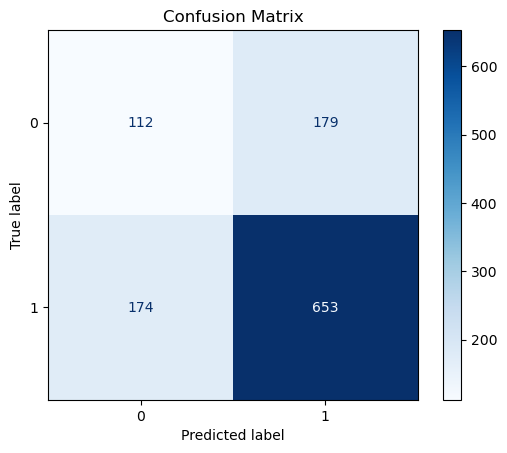

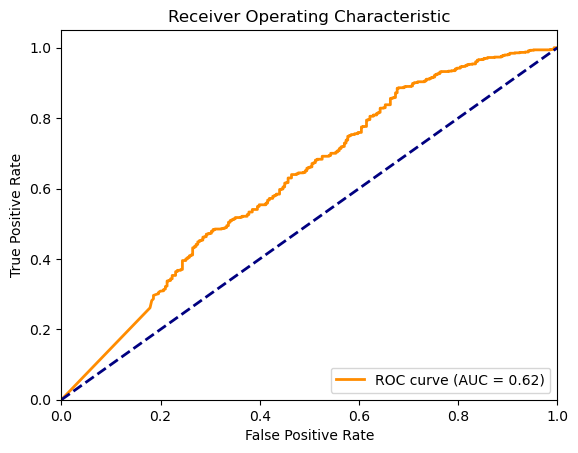

In [8]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)  # Plot with colormap
plt.title('Confusion Matrix')
plt.show()

# ROC 
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [9]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))


Classification Report:
              precision    recall  f1-score   support

      Benign       0.39      0.38      0.39       291
   Malignant       0.78      0.79      0.79       827

    accuracy                           0.68      1118
   macro avg       0.59      0.59      0.59      1118
weighted avg       0.68      0.68      0.68      1118

